In [184]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [186]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

## We loaded the dataset and displayed the training data's shape. Each picture is a 32 x 32 matrix  with 3 colour channels - RGB

In [189]:
X_test.shape

(10000, 32, 32, 3)

## The test data's shape was also loaded and it has 10,000 unique samples.

In [212]:
y_train[:5] #This loads the first five elements (pictures) of the training data as an array, 
            #but it loads each image as a matrix that is encoded by the class encoding used in the dataset

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [214]:
y_train = y_train.reshape(-1,) #This reshapes the matrix listing of the encoded classes and just displays the encoded class as a sinular element each
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [69]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## There are 10 distinct classes in the CIFAR-10 Dataset

In [218]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

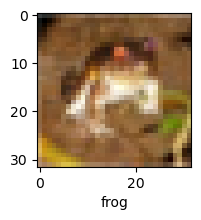

In [220]:
plot_sample(X_train, y_train, 0)

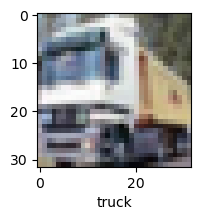

In [222]:
plot_sample(X_train, y_train, 1)

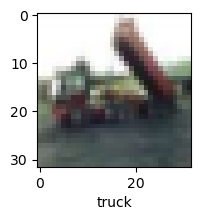

In [224]:
plot_sample(X_train, y_train, 2)

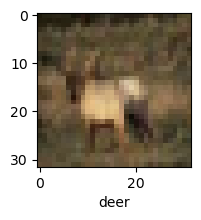

In [226]:
plot_sample(X_train, y_train, 3)

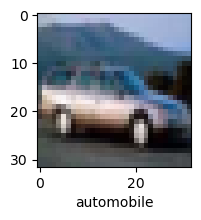

In [228]:
plot_sample(X_train, y_train, 4)

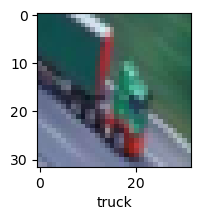

In [230]:
plot_sample(X_train, y_train, 50)

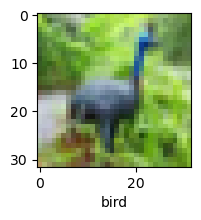

In [232]:
plot_sample(X_train, y_train, 6)

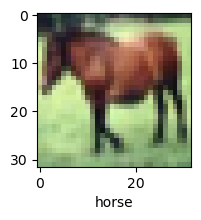

In [234]:
plot_sample(X_train, y_train, 7)

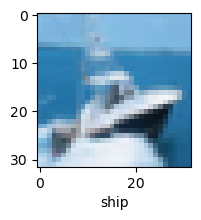

In [236]:
plot_sample(X_train, y_train, 8)

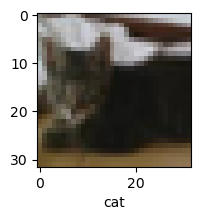

In [238]:
plot_sample(X_train, y_train, 9)

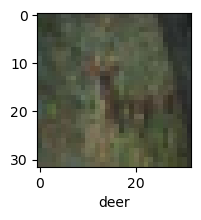

In [240]:
plot_sample(X_train, y_train, 10)

## Perform scaling (normalization) by dividing by the pixel value of 255

In [243]:
X_train = X_train/255
X_test = X_test/255

## Try out a simple ANN for Classification

In [247]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),  #3000 neurons are used for this layer. RELU brings non-linearity so the model can understand complex patterns
    layers.Dense(1000, activation='relu'),  #1000 neurons are used for this layer
    layers.Dense(10, activation='sigmoid')  #10 neurons, where each represents each one of the 10 classes in the dataset
])

ann.compile(optimizer='SGD', #optimizer='SGD': This sets the optimization algorithm to Stochastic Gradient Descent (SGD). 
                             #SGD is an iterative optimization algorithm used to find the best weights in the neural network by taking small steps 
                             #in the direction that reduces the loss.
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 34ms/step - accuracy: 0.3081 - loss: 1.9270
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.4205 - loss: 1.6427
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4531 - loss: 1.5570
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4771 - loss: 1.4870
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4978 - loss: 1.4373


In [86]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4554 - loss: 1.5331


[1.5386916399002075, 0.4503999948501587]

### Observe the low accuracy of the ANN

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.38      0.49      1000
           1       0.71      0.48      0.58      1000
           2       0.33      0.34      0.33      1000
           3       0.41      0.16      0.23      1000
           4       0.30      0.60      0.40      1000
           5       0.48      0.26      0.34      1000
           6       0.36      0.72      0.48      1000
           7       0.83      0.23      0.36      1000
           8       0.53      0.71      0.61      1000
           9       0.51      0.62      0.56      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.44     10000
weighted avg       0.52      0.45      0.44     10000



## Now write a CNN to solve the problem

In [251]:
cnn = models.Sequential([
    #models.Sequential means that I am stacking layers one after the other in a linear manner
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), #In CNNs, I have the flexibility of setting the 
                                                                                            #number and the dimension of my filter 
    layers.MaxPooling2D((2,2)), #The MaxPooling layer brings in effectiveness by reducing the dimension of our matrix

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),

    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')    #The softmax output activation function introduces normalization to the output
    ])

In [253]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.3690 - loss: 1.7343
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5829 - loss: 1.1783
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6420 - loss: 1.0207
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6789 - loss: 0.9245
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7017 - loss: 0.8586
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7173 - loss: 0.8134
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7404 - loss: 0.7551
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7492 - loss: 0.7192
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7656 - loss: 0.6679
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7747 - loss: 0.6508


In [125]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6976 - loss: 0.8896


[0.9058516621589661, 0.6934999823570251]

# We can see that we now have a higher accuracy, compared to when we used ANN

In [256]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

## We have to reshape the test set to a 1d array first before we can successfully visulaize each element

In [260]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

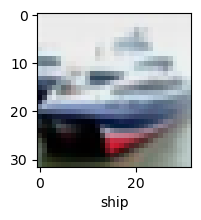

In [262]:
plot_sample(X_test, y_test, 1)

In [139]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[2.08059457e-04, 5.03031944e-04, 1.11953018e-03, 7.66781628e-01,
        1.73120573e-03, 1.25464067e-01, 1.01089805e-01, 5.68873947e-05,
        9.49945301e-04, 2.09594052e-03],
       [6.60676882e-03, 1.39420718e-01, 9.27314031e-05, 3.26640293e-06,
        2.45658111e-06, 2.40497116e-08, 1.35270824e-07, 4.91057881e-06,
        8.48795354e-01, 5.07362839e-03],
       [6.52600005e-02, 7.54625797e-02, 8.19216575e-03, 1.95371322e-02,
        1.15475664e-02, 4.02345741e-03, 2.31963512e-03, 7.28606060e-03,
        7.64107347e-01, 4.22639735e-02],
       [8.22951257e-01, 1.74861010e-02, 6.32294454e-03, 4.72395262e-03,
        1.92003194e-02, 3.51898512e-03, 1.76001200e-03, 2.46564322e-03,
        1.20306268e-01, 1.26448157e-03],
       [1.15399916e-06, 6.47715569e-06, 1.35772051e-02, 1.84837207e-02,
        7.80097365e-01, 1.97315574e-04, 1.87632233e-01, 4.97229053e-07,
        3.91628282e-06, 7.98126436e-08]], dtype=float32)

### Each element above is a probability distribution between 0 and 1, which was computed using softmax. So to get the maximum element, we will use the argmax function as seen below (the output of the argmax function is the index of the highest value):

In [147]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [149]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

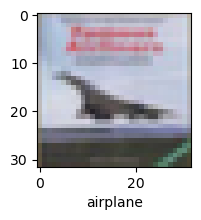

In [165]:
plot_sample(X_test, y_test, 3)

In [167]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [171]:
classes[y_classes[3]]

'airplane'

In [173]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.63      0.71      1000
           1       0.87      0.75      0.80      1000
           2       0.58      0.58      0.58      1000
           3       0.49      0.52      0.50      1000
           4       0.62      0.67      0.64      1000
           5       0.61      0.57      0.59      1000
           6       0.76      0.78      0.77      1000
           7       0.74      0.76      0.75      1000
           8       0.80      0.81      0.80      1000
           9       0.71      0.86      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

